# Handwritten Digits Application

In [1]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [14]:
type(digits)

sklearn.utils.Bunch

In [12]:
digits.images.shape

(1797, 8, 8)

#### See, how it looks

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

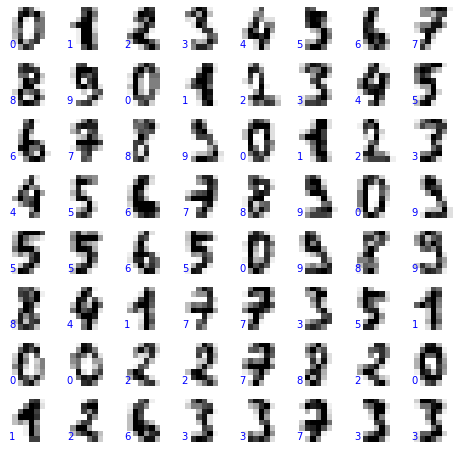

In [41]:
fig, axes = plt.subplots(8,8, figsize= (8,8), subplot_kw= {'xticks': [], 'yticks': []},          # ax.set(xticks=[], yticks=[])
                                              gridspec_kw= {'hspace': 0.3, 'wspace': 0.3})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap= 'binary', interpolation= 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform= ax.transAxes, color= 'blue')
    for s in ax.spines.values():
        s.set_visible(False)

#### The code above is so simple. Break it down line by line and will make you understand

In [52]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

    That is the Data in 64 format
And also remember...
```python
digits.data[0].reshape(8,8) == digits.images[0] -> True
```
   

In [60]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [69]:
# 1. Choose the model
from sklearn.manifold import Isomap

In [70]:
# 2. Hyperparameter selection
iso = Isomap(n_components= 2)

In [71]:
iso.fit(digits.data)

Isomap()

In [74]:
reduced_data = iso.transform(digits.data)

In [75]:
reduced_data.shape

(1797, 2)

In [76]:
X = reduced_data[:, 0]
Y = reduced_data[:, 1]

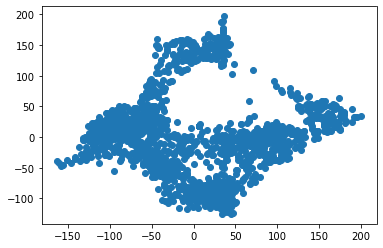

In [77]:
plt.scatter(X, Y)

##### Beautifully

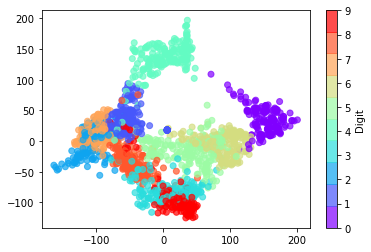

In [88]:
plt.scatter(X, Y, c= digits.target, edgecolors= None, alpha= 0.7, cmap= plt.cm.get_cmap('rainbow', 10));
plt.colorbar(label= 'Digit');